##ESERCIZIO1: generatore lineare congruenziale


In [ ]:
#Write a function that implements the linear congruential generator (LCG) for pseudo-random numbers, using these parameters:

import random

#si basa chiaramente su una scrittura di ricorrenza

#def seedLCG(initVal):
    #global rand
    #rand = initVal
#seedLCG(1)
random.seed(1)

def lcg():
    M = 2147483647
    A = 214013
    C = 2531011
    global rand
    rand = (A*rand + C) % M
    return rand


for i in range(10):
    print(lcg())

#the first element of the sequence, with index zero, is the seed
#This algorithm generates by construction numbers between 0 and M
#QUINDI GENERA UNA SEQUENZA PSEUDOCASUALE DI NUMERI  INTERI

825883882
1248203142
1915742233
462124094
354381295
1674140394
1639006653
901942167
783906587
485463708


#esercizio 2: si basa sulla lezione 5 (...)

#ESERCIZIO3:

In [ ]:
#Show that initializing the seed of a pseudo-random integer generator is equivalent to looking into a sequence of pseudo-random numbers at any point.

import random

randlist = []

M = 2147483647
random.seed(1)
for i in range (5):
    # Return the next random floating point number in the range 0.0 <= X < 1.0
    randlist.append (random.randint (0,M))
    print (i, randlist[-1])



0 577090037
1 271041745
2 1095513148
3 506456969
4 2127877499


#ESERCIZIO4:

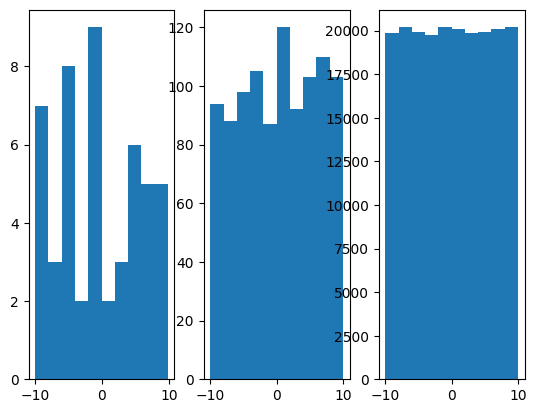

In [ ]:
#Implement a pseudo-random number generator according to a uniform distribution between two arbitrary endpoints.

#Use the matplotlib library to visualize the distribution of the generated numbers.

import random
import matplotlib.pyplot as plt
import numpy as np


list1=[] #voglio creare un input sulle x con numeri casuali
random.seed(1)

xmin=-10   #2 arbitrary endpoints
xmax=10

fig, axes = plt.subplots(1,3)

N=50
for i in range(N):
  list1.append(xmin+(xmax-xmin)*random.random())
axes[0].hist(list1)


list1=[]
N=1000
for i in range(N):
  list1.append(xmin+(xmax-xmin)*random.random())
axes[1].hist(list1)


list1=[]
N=200000
for i in range(N):
  list1.append(xmin+(xmax-xmin)*random.random())
axes[2].hist(list1)

plt.show()





(array([10083., 10081., 10265., 10053., 10001., 10188., 10042., 10049.,
        10032., 10306.]),
 array([-9.99922804e+00, -7.99932342e+00, -5.99941880e+00, -3.99951418e+00,
        -1.99960957e+00,  2.95050190e-04,  2.00019967e+00,  4.00010429e+00,
         6.00000890e+00,  7.99991352e+00,  9.99981814e+00]),
 <BarContainer object of 10 artists>)

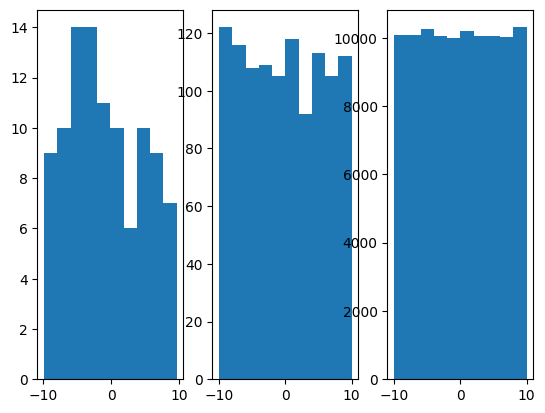

In [ ]:
#riscriviamolo meglio con una funzione ecc

import random
import matplotlib.pyplot as plt
import numpy as np

def rand_hist(a,b): #funzione cuore del programma che richiamo all'interno dei cicli
   return b+(a-b)*random.random()

xmin=-10
xmax=10
N=100

list1=[]
fig, axes = plt.subplots(1,3)

for i in range(N):
  list1.append(rand_hist(xmin,xmax))
axes[0].hist(list1)

N=N*10

for i in range(N):
  list1.append(rand_hist(xmin,xmax))
axes[1].hist(list1)

N=N*100

for i in range(N):
  list1.append(rand_hist(xmin,xmax))
axes[2].hist(list1)


#ES 4: utilizziamo la libreria myrand (in realtà esplicito le funzioni utili)

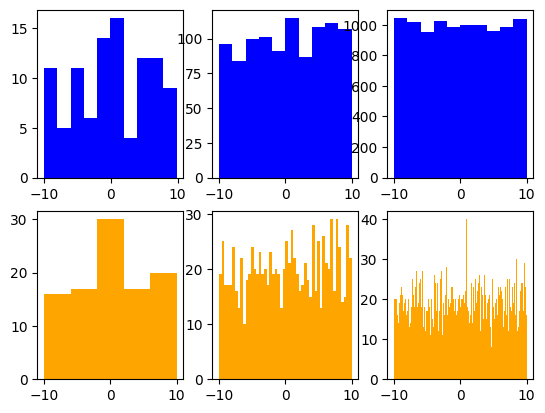

In [23]:
#Si implementi un generatore di numeri pseudo-casuali secondo una distribuzione uniforme
#fra due estremi arbitrari.

import random
import matplotlib.pyplot as plt
import numpy as np
from math import floor,sqrt

#------------------------
#------------------------
#from myrand import generate_range:

def rand_range (xMin, xMax) :
    '''
    generazione di un numero pseudo-casuale distribuito fra xMin ed xMax
    '''
    return xMin + random.random () * (xMax - xMin)


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


def generate_range (xMin, xMax, N, seed = 0.) :
    '''
    generazione di N numeri pseudo-casuali distribuiti fra xMin ed xMax
    a partire da un determinato seed
    '''
    if seed != 0. : random.seed (float (seed))
    randlist = []
    for i in range (N):
        # Return the next random floating point number in the range 0.0 <= X < 1.0
        randlist.append (rand_range (xMin, xMax))
    return randlist

#-------------------------------------------------------------
#-------------------------------------------------------------

def main () :
    '''
    Funzione che implementa il programma principale
    '''



    xMin = float (-10)  # minimum of the histogram drawing range
    xMax = float (10)  # maximum of the histogram drawing range
    seed = float (1)
    N    = int (100)
    N1   = int (N*10)
    N2   = int (N1*10)



    randlist0= generate_range (xMin, xMax, N, seed)
    randlist1= generate_range (xMin, xMax, N1, seed)
    randlist2= generate_range (xMin, xMax, N2, seed)
    # plotting of the generated list of numbers in a histogram

    nBins0= floor (len (randlist0) / 20.) + 1     # number of bins of the hitogram
    nBins1= floor (len (randlist1) / 20.) + 1
    nBins2= floor (len (randlist2) / 20.) + 1



    bin_edges0 = np.linspace (xMin, xMax, nBins0)  # edges o the histogram bins
    bin_edges1 = np.linspace (xMin, xMax, nBins1)
    bin_edges2 = np.linspace (xMin, xMax, nBins2)
    # disegno della funzione
    fig, ax = plt.subplots (2,3)


    #ax.set_title ('Histogram of random numbers', size=14)
    #ax.set_xlabel ('random value')
    #ax.set_ylabel ('events in bin')

    ax[0][0].hist (randlist0,      # list of numbers
             #bins = bin_edges0,
             color = 'blue',
             # normed = True,
            )
    ax[0][1].hist (randlist1,      # list of numbers
             #bins = bin_edges1,
             color = 'blue',
             # normed = True,
            )
    ax[0][2].hist (randlist2,      # list of numbers
             #bins = bin_edges2,
             color = 'blue',
             # normed = True,
            )

    #ORA LE CONFRONTIAMO CON IL BINNING INCLUSO come parametro:
    ax[1][0].hist (randlist0,      # list of numbers
             bins = bin_edges0,
             color = 'orange',
             # normed = True,
            )
    ax[1][1].hist (randlist1,      # list of numbers
             bins = bin_edges1,
             color = 'orange',
             # normed = True,
            )
    ax[1][2].hist (randlist2,      # list of numbers
             bins = bin_edges2,
             color = 'orange',
             # normed = True,
            )
   #plt.savefig ('es_4.4.png')


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


if __name__ == "__main__":
    main ()

#ESERCIZIO 5:

In [48]:
#implement a pseudo-random number generator that uses the try-and-catch method to generate pseudo-random numbers
#according to an arbitrary probability distribution.
#Take the probability density function (pdf) as an input parameter for generating random numbers.
#Use the matplotlib library to visualize the distribution of the generated numbers.

import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

def main():
 xMin=0
 xMax=10
 yMax=1

 x = random.random(xMin, xMax) #generati i numeri casuali passato alla funzione pdf
 y = random.random(0, yMax)
 normal = norm(100.,10.) #media 100, sigma 10

 f=normal.pdf(x) #COSI DEFINISCO una pdf normale( gaussiana) da passare all'interno del TAC


 list1=[]
 while (y > f(x)) : #SELEZIONO I PUNTI IDONEI (al di sotto della pdf)
        x = random.random(xMin, xMax) #generati i numeri casuali passato alla funzione pdf
        y = random.random(0, yMax)
        list1.append(x)



#plottiamo su matplotlib:
 plt.close()
 fig, axes = plt.subplots(1,1)

 axes.hist(list1)
 plt.show()

if __name__ == "__name__":
  main()

In [49]:
#implement a pseudo-random number generator that uses the try-and-catch method to generate pseudo-random numbers
#according to an arbitrary probability distribution, take the probability density function (pdf) as an input parameter for generating random numbers.
#Use the matplotlib library to visualize the distribution of the generated numbers


import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from math import floor,sqrt

#myrand:
#************************************************************************

def rand_range (xMin, xMax) :
    '''
    generazione di un numero pseudo-casuale distribuito fra xMin ed xMax
    '''
    return xMin + random.random () * (xMax - xMin)


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

def rand_TAC (f, xMin, xMax, yMax) :
    '''
    generazione di un numero pseudo-casuale
    con il metodo try and catch
    '''
    x = rand_range (xMin, xMax)
    y = rand_range (0, yMax)
    while (y > f (x)) :
        x = rand_range (xMin, xMax)
        y = rand_range (0, yMax)
    return x


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


def generate_TAC (f, xMin, xMax, yMax, N, seed = 0.) :
    '''
    generazione di N numeri pseudo-casuali
    con il metodo try and catch, in un certo intervallo,
    a partire da un determinato seed
    '''
    if seed != 0. : random.seed (float (seed))
    randlist = []
    for i in range (N):
        # Return the next random floating point number in the range 0.0 <= X < 1.0
        randlist.append (rand_TAC (f, xMin, xMax, yMax))
    return randlist
#**********************************************************************************

def main():

  xMin = float(0)
  xMax = float(10)
  yMax = float(6)
  seed = float(1)

  #definizione della funzione (densità di prob) da inserire in generate_TAC


  def func (x) :
    '''
    funzione pdf (uso la normale) sotto la quale generare numeri casuali
    '''
    normal = norm() #media 0, sigma 1
    return normal.pdf(x)

    randlist = generate_TAC (func, xMin, xMax, yMax, N, seed)   #lista numeri random generati con il TAC

    # plotting of the generated list of numbers in a histogram:

    nBins = floor (len (randlist) / 400.)             # number of bins of the hitogram
    bin_edges = np.linspace (xMin, xMax, nBins + 1)  # edges of the histogram bins

    # disegno della funzione
    fig, ax = plt.subplots ()
    ax.set_title ('Histogram of random numbers', size=14)
    ax.set_xlabel ('random value')
    ax.set_ylabel ('events in bin')
    ax.hist (randlist,      # list of numbers
             bins = bin_edges,
             color = 'orange',
             # normed = True,
            )

    plt.show ()

if __name__ == "__main__":
  main ()